In [3]:
# Кластеризация: анализ mall_customers_clustering.csv и credit_card_clustering.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np

# === Работа с mall_customers_clustering.csv ===
df_mall = pd.read_csv("mall_customers_clustering.csv")
df_mall.drop(columns=['Unnamed: 0', 'CustomerID'], inplace=True)
df_mall['Genre'] = LabelEncoder().fit_transform(df_mall['Genre'])

scaler = StandardScaler()
X_mall = scaler.fit_transform(df_mall)

# К-средних
kmeans = KMeans(n_clusters=4, random_state=42)
df_mall['Cluster'] = kmeans.fit_predict(X_mall)


In [4]:
# 1) Примеры точек
print("Примеры точек для каждого кластера (mall):")
print(df_mall.groupby('Cluster').head(1))


Примеры точек для каждого кластера (mall):
     Genre  Age  Income  Score  Cluster
0        1   19   15000   0.39        2
2        0   20   16000   0.06        3
6        0   35   18000   0.06        0
126      1   43   71000   0.35        1


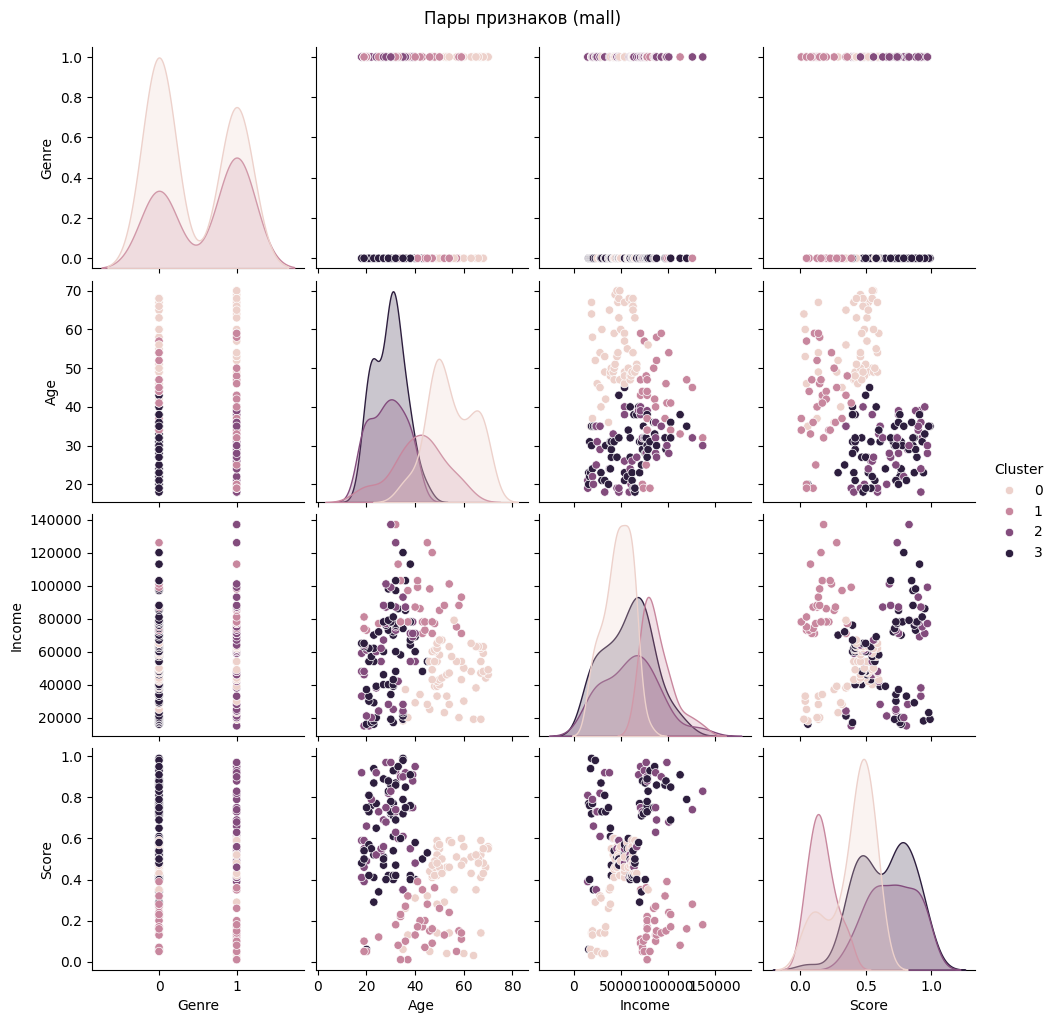

In [5]:
# 2) Визуализация с другими парами признаков
sns.pairplot(df_mall, hue='Cluster')
plt.suptitle("Пары признаков (mall)", y=1.02)
plt.show()


In [6]:
# 3 === Анализ credit_card_clustering.csv ===
df_card = pd.read_csv("credit_card_clustering.csv")
df_card.drop(columns=['CUST_ID'], inplace=True)
df_card = df_card.dropna()

X_card = StandardScaler().fit_transform(df_card)

kmeans_card = KMeans(n_clusters=5, random_state=42)
df_card['Cluster'] = kmeans_card.fit_predict(X_card)

print("Примеры точек для каждого кластера (credit card):")
print(df_card.groupby('Cluster').head(1))


Примеры точек для каждого кластера (credit card):
          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
6      627.260806           1.000000    7091.01           6402.63   
138  19043.138560           1.000000   22009.92           9449.07   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.40      0.000000             0.166667   
1                      0.00   6442.945483             0.000000   
2                      0.00      0.000000             1.000000   
6                    688.38      0.000000             1.000000   
138                12560.85      0.000000             1.000000   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                          0.00                          0.083333   


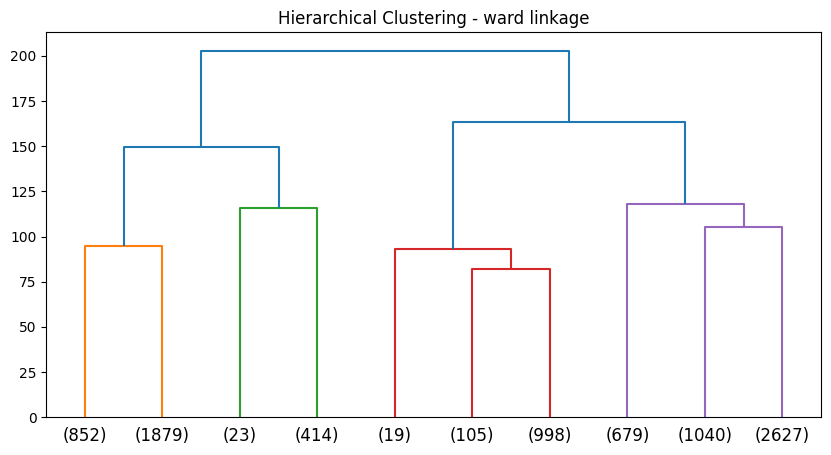

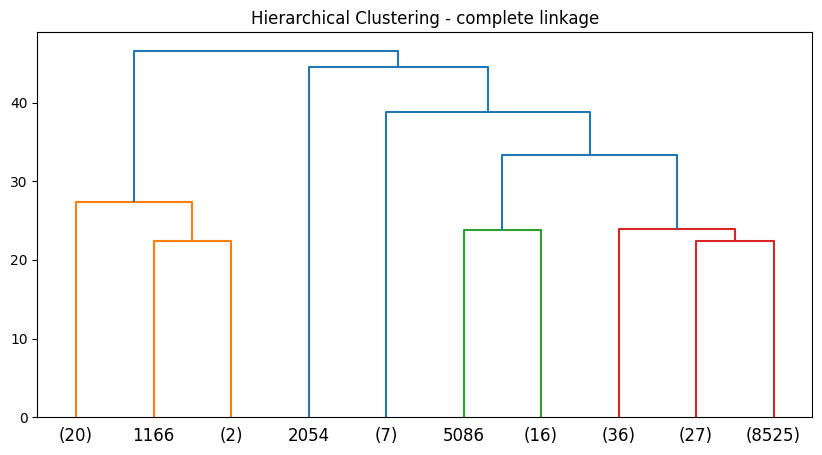

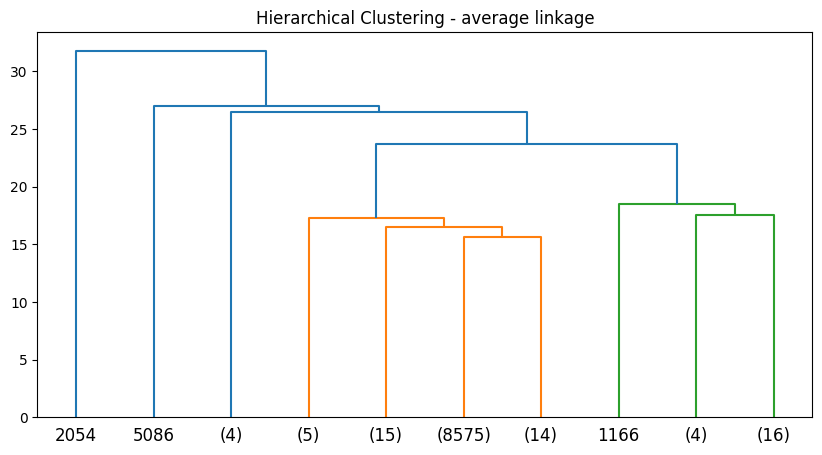

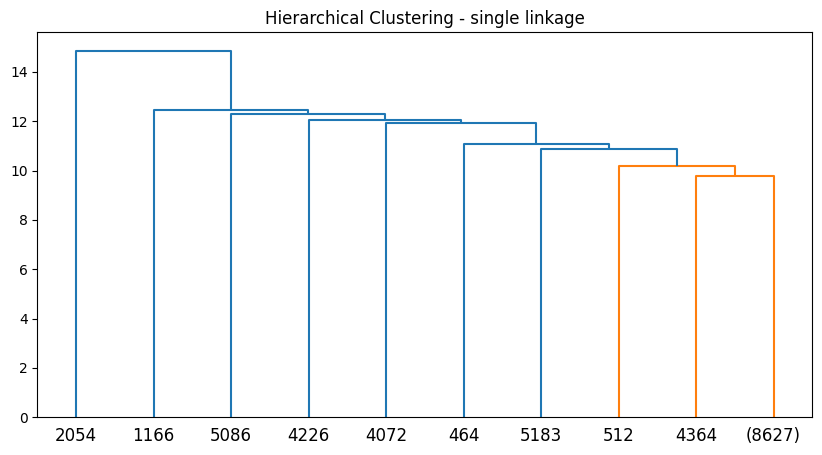

In [7]:
# 4) Иерархическая кластеризация
methods = ['ward', 'complete', 'average', 'single']
for method in methods:
    Z = linkage(X_card, method=method)
    plt.figure(figsize=(10, 5))
    dendrogram(Z, truncate_mode='lastp', p=10)
    plt.title(f"Hierarchical Clustering - {method} linkage")
    plt.show()

In [8]:
# 5) Сравнение DBSCAN и KMeans
kmeans_labels = kmeans_card.labels_
dbscan = DBSCAN(eps=2, min_samples=5)
df_card['DBSCAN'] = dbscan.fit_predict(X_card)

print("Silhouette KMeans:", silhouette_score(X_card, kmeans_labels))
if len(set(dbscan.labels_)) > 1:
    print("Silhouette DBSCAN:", silhouette_score(X_card, dbscan.labels_))
else:
    print("DBSCAN кластеризовал всё в один кластер или шум")

Silhouette KMeans: 0.19034732611741967
Silhouette DBSCAN: 0.38983591171444737


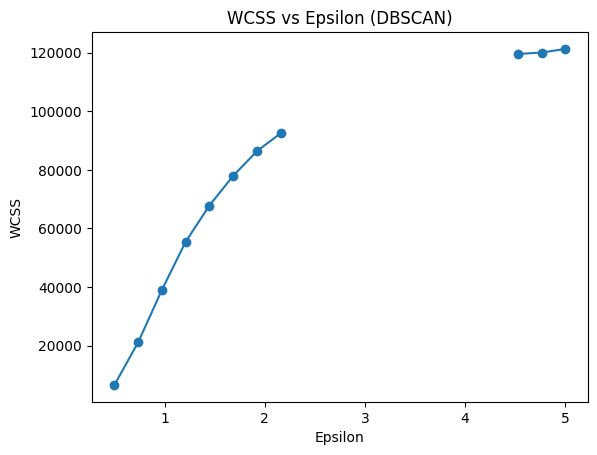

In [9]:
# 6) Кривая WCSS для DBSCAN по eps
wcss_values = []
eps_range = np.linspace(0.5, 5, 20)
for eps in eps_range:
    labels = DBSCAN(eps=eps, min_samples=5).fit_predict(X_card)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        wcss = 0
        for i in range(n_clusters):
            cluster_points = X_card[labels == i]
            centroid = cluster_points.mean(axis=0)
            wcss += ((cluster_points - centroid) ** 2).sum()
        wcss_values.append(wcss)
    else:
        wcss_values.append(None)

plt.plot(eps_range, wcss_values, marker='o')
plt.title("WCSS vs Epsilon (DBSCAN)")
plt.xlabel("Epsilon")
plt.ylabel("WCSS")
plt.show()
